

## Breaking Barriers: The Journey of Women's Empowerment




Import packages




In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
world_data = pd.read_csv('/content/drive/MyDrive/Large Data Sets for Python/worlddata.csv')

In [ ]:
world_data.head()

CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   

    IndicatorCode  Year         Value  
0     SP.ADO.TFRT  1960  1.335609e+02  
1     SP.POP.DPND  1960  8.779760e+01  
2  SP.POP.DPND.OL  1960  6.634579e+00  
3  SP.POP.DPND.YG  1960  8.102333e+01  
4  MS.MIL.XPRT.KD  1960  3.000000e+06

In [ ]:
world_data.describe()


Year         Value
count  5.656458e+06  5.656458e+06
mean   1.994464e+03  1.070501e+12
std    1.387895e+01  4.842469e+13
min    1.960000e+03 -9.824821e+15
25%    1.984000e+03  5.566242e+00
50%    1.997000e+03  6.357450e+01
75%    2.006000e+03  1.346722e+07
max    2.015000e+03  1.103367e+16

In [ ]:
for i in world_data["IndicatorName"].unique():
  print(i)

Adolescent fertility rate (births per 1,000 women ages 15-19)
Age dependency ratio (% of working-age population)
Age dependency ratio, old (% of working-age population)
Age dependency ratio, young (% of working-age population)
Arms exports (SIPRI trend indicator values)
Arms imports (SIPRI trend indicator values)
Birth rate, crude (per 1,000 people)
CO2 emissions (kt)
CO2 emissions (metric tons per capita)
CO2 emissions from gaseous fuel consumption (% of total)
CO2 emissions from liquid fuel consumption (% of total)
CO2 emissions from liquid fuel consumption (kt)
CO2 emissions from solid fuel consumption (% of total)
Death rate, crude (per 1,000 people)
Fertility rate, total (births per woman)
Fixed telephone subscriptions
Fixed telephone subscriptions (per 100 people)
Hospital beds (per 1,000 people)
International migrant stock (% of population)
International migrant stock, total
Life expectancy at birth, female (years)
Life expectancy at birth, male (years)
Life expectancy at birth,

## Education as a Catalyst

In [ ]:
from urllib.request import urlopen
import json

import pandas as pd

import plotly.express as px
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json' # for US map with state boundaries
world_geo = f'{url}/world-countries.json' # for world map with country boundaries
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'

In [ ]:
wdiselect = world_data[(world_data['IndicatorName']=="Gross enrolment ratio, tertiary, female (%)") ]
wdiselect.head()
data_to_plot = wdiselect[['CountryCode','Value', 'CountryName', 'Year']]
data_to_plot.head()


CountryCode     Value                                CountryName  Year
297732         ARB   4.16129                                 Arab World  1970
297942         CSS   4.47368                     Caribbean small states  1970
298104         CEB  12.33181             Central Europe and the Baltics  1970
298912         EMU  15.96959                                  Euro area  1970
299147         ECS  23.87426  Europe & Central Asia (all income levels)  1970

In [ ]:
#teriary education enrollment
fig = px.choropleth(data_to_plot, geojson=world_geo, locations='CountryCode', color='Value',
                           color_continuous_scale="Jet",animation_frame="Year", animation_group="CountryName",hover_name="CountryName",
                           range_color=(data_to_plot.Value.min(), data_to_plot.Value.max()),
                           scope="world",
                           labels={'Gross enrolment ratio, tertiary, female (%) '}
                          )
fig.show()
fig.write_html('//content/drive/MyDrive/tertiaryeducation.html')

# Economic Participation - A Mixed Picture

In [ ]:
#labor force participation
female_labor_force = world_data[(world_data['IndicatorName']=="Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)") ]
gdp_per_capita = world_data[world_data["IndicatorName"] == "GDP per capita (current US$)"]
female_population = world_data[world_data["IndicatorName"] == "Population, female (% of total)"]
female_population.head()

CountryName CountryCode  \
72                                Arab World         ARB   
149                   Caribbean small states         CSS   
220           Central Europe and the Baltics         CEB   
340  East Asia & Pacific (all income levels)         EAS   
461    East Asia & Pacific (developing only)         EAP   

                       IndicatorName      IndicatorCode  Year      Value  
72   Population, female (% of total)  SP.POP.TOTL.FE.ZS  1960  49.612960  
149  Population, female (% of total)  SP.POP.TOTL.FE.ZS  1960  51.325868  
220  Population, female (% of total)  SP.POP.TOTL.FE.ZS  1960  51.590151  
340  Population, female (% of total)  SP.POP.TOTL.FE.ZS  1960  49.200500  
461  Population, female (% of total)  SP.POP.TOTL.FE.ZS  1960  49.002760

In [ ]:
merged_data = pd.merge(
    female_labor_force,
    gdp_per_capita,
    on=["CountryCode", "Year", "CountryName"],
    how="inner",
    suffixes=("_labor", "_gdp"),
)

merged_data = pd.merge(
    merged_data,
    female_population,
    on=["CountryCode", "Year", "CountryName"],
    how="inner",
    suffixes=("", "_population"),
)

# Rename columns for clarity
merged_data = merged_data.rename(
    columns={
        "Value_labor": "FemaleLaborForceParticipation",
        "Value_gdp": "GDPPerCapita",
        "Value": "FemalePopulation",
    }
)
merged_data.head()

# Select countries and years for the visualization
countries = ['Arab World',
       'Central Europe and the Baltics',
       'East Asia & Pacific (all income levels)',
       'Euro area',
       'Europe & Central Asia (all income levels)',
           'Latin America & Caribbean (all income levels)',
           'Middle East & North Africa (all income levels)',
           'North America', 'South Asia',
           'Sub-Saharan Africa (all income levels)', 'World']
filtered_data = merged_data[
    (merged_data["CountryName"].isin(countries))
]


In [ ]:
fig = px.scatter(
    filtered_data,
    x="GDPPerCapita",
    y="FemaleLaborForceParticipation",
    size="FemalePopulation",
    color="CountryName",
    animation_frame="Year",
    animation_group="CountryName",
    hover_name="CountryName",
    title="Female Labor Force Participation vs. GDP per capita (1990-2020)",
    range_x=[0, filtered_data['GDPPerCapita'].max()],
    range_y=[0, filtered_data['FemaleLaborForceParticipation'].max()],
)

fig.update_layout(
    xaxis_title="GDP per capita (current US$)",
    yaxis_title="Labor force participation rate, female (% of female population ages 15+)",
)


fig.show()
# Save the Plotly animation as an HTML file
fig.write_html('//content/drive/MyDrive/laborworkforce.html')


In [ ]:
#  Labor Force Participation

labor_force_participation_female = world_data[
    world_data["IndicatorName"] == "Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)"
]

# Group data by region and year and calculate the average female labor force participation rate
regions = ['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics',
       'East Asia & Pacific (all income levels)',
       'Euro area',
       'Europe & Central Asia (all income levels)',
           'Latin America & Caribbean (all income levels)',
           'Middle East & North Africa (all income levels)',
           'North America', 'OECD members', 'South Asia',
           'Sub-Saharan Africa (all income levels)', 'World']
labor_force_by_region = labor_force_participation_female[labor_force_participation_female['CountryName'].isin(regions)].groupby(['Year', 'CountryName'])['Value'].mean().reset_index()

# Create a line chart with stacked areas by region
fig = px.line(
    labor_force_by_region,
    x="Year",
    y="Value",
    color="CountryName",
    title="Female Labor Force Participation Rate by Region (1990-2020)",
)

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Labor Force Participation Rate (% of female population ages 15+)",
)

fig.show()

# The Health-Wealth Connection

In [ ]:


maternal_mortality = world_data[world_data["IndicatorName"] == "Maternal mortality ratio (modeled estimate, per 100,000 live births)"]
gdp_per_capita = world_data[world_data["IndicatorName"] == "GDP per capita (current US$)"]
total_female_population = world_data[world_data["IndicatorName"] == "Population, female (% of total)"]


merged_data = pd.merge(
    maternal_mortality,
    gdp_per_capita,
    on=["CountryCode", "Year", "CountryName"],
    how="inner",
    suffixes=("_mortality", "_gdp"),
)

merged_data = pd.merge(
    merged_data,
    total_female_population,
    on=["CountryCode", "Year", "CountryName"],
    how="inner",
    suffixes=("", "_population"),
)

# Rename columns for clarity
merged_data = merged_data.rename(
    columns={
        "Value_mortality": "MaternalMortalityRatio",
        "Value_gdp": "GDPPerCapita",
        "Value": "TotalFemalePopulation",
    }
)

merged_data.head()


CountryName CountryCode  \
0                               Arab World         ARB   
1                   Caribbean small states         CSS   
2           Central Europe and the Baltics         CEB   
3  East Asia & Pacific (all income levels)         EAS   
4    East Asia & Pacific (developing only)         EAP   

                             IndicatorName_mortality IndicatorCode_mortality  \
0  Maternal mortality ratio (modeled estimate, pe...             SH.STA.MMRT   
1  Maternal mortality ratio (modeled estimate, pe...             SH.STA.MMRT   
2  Maternal mortality ratio (modeled estimate, pe...             SH.STA.MMRT   
3  Maternal mortality ratio (modeled estimate, pe...             SH.STA.MMRT   
4  Maternal mortality ratio (modeled estimate, pe...             SH.STA.MMRT   

   Year  MaternalMortalityRatio             IndicatorName_gdp  \
0  1990                   289.0  GDP per capita (current US$)   
1  1990                    94.0  GDP per capita (current US$)   
2  1990                    41.0  GDP per capita (current US$)   
3  1990                   159.0  GDP per capita (current US$)   
4  1990                   168.0  GDP per capita (current US$)   

  IndicatorCode_gdp  GDPPerCapita                    IndicatorName  \
0    NY.GDP.PCAP.CD   2000.003816  Population, female (% of total)   
1    NY.GDP.PCAP.CD   2963.161513  Population, female (% of total)   
2    NY.GDP.PCAP.CD   2297.201542  Population, female (% of total)   
3    NY.GDP.PCAP.CD   2591.048371  Population, female (% of total)   
4    NY.GDP.PCAP.CD    418.055540  Population, female (% of total)   

       IndicatorCode  TotalFemalePopulation  
0  SP.POP.TOTL.FE.ZS              49.036236  
1  SP.POP.TOTL.FE.ZS              50.536007  
2  SP.POP.TOTL.FE.ZS              51.362092  
3  SP.POP.TOTL.FE.ZS              49.272490  
4  SP.POP.TOTL.FE.ZS              49.113487

In [ ]:


fig = px.scatter(
    merged_data,
    x="GDPPerCapita",
    y="MaternalMortalityRatio",
    size="TotalFemalePopulation",
    color="CountryName",
    animation_frame="Year",
    animation_group="CountryName",
    hover_name="CountryName",
    title="Maternal Mortality vs. GDP per capita (1990-2014)",
    range_x=[0, merged_data['GDPPerCapita'].max()],
    range_y=[0,1500],
)

fig.update_layout(
    xaxis_title="GDP per capita (current US$)",
    yaxis_title="Maternal mortality ratio (modeled estimate, per 100,000 live births)",
)


fig.show()
fig.write_html('//content/drive/MyDrive/maternalmortality.html')

# The Stubborn Wage Gap

In [ ]:


female_labor_participation = world_data[
    world_data["IndicatorName"] == "Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)"
]
male_labor_participation = world_data[
    world_data["IndicatorName"] == "Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)"
]

# Merge the dataframes to get female and male labor force participation rates for the same countries and years
merged_data = pd.merge(
    female_labor_participation,
    male_labor_participation,
    on=["CountryCode", "Year", "CountryName"],
    how="inner",
    suffixes=("_female", "_male"),
)

# Calculate the ratio of female to male labor force participation
merged_data["GenderWageGap"] = (
    merged_data["Value_female"] / merged_data["Value_male"] * 100
)

# Select countries and years for the visualization
countries = ['Arab World',
       'Central Europe and the Baltics',
       'East Asia & Pacific (all income levels)',
       'Euro area',
       'Europe & Central Asia (all income levels)',
           'Latin America & Caribbean (all income levels)',
           'Middle East & North Africa (all income levels)',
           'North America', 'South Asia',
           'Sub-Saharan Africa (all income levels)', 'World']
years = [1980, 1990, 2000, 2010]  # You can modify the years as needed
filtered_data = merged_data[
    (merged_data["CountryName"].isin(countries)) & (merged_data["Year"].isin(years))
]

# Create the grouped bar chart
fig = px.bar(
    filtered_data,
    x="CountryName",
    y="GenderWageGap",
    color="Year",
    barmode="relative",
    title="Gender Wage Gap by Country and Year",
    labels={"GenderWageGap": "Gender Wage Gap (%)"},
)

fig.show()

# Breaking the Glass Ceiling

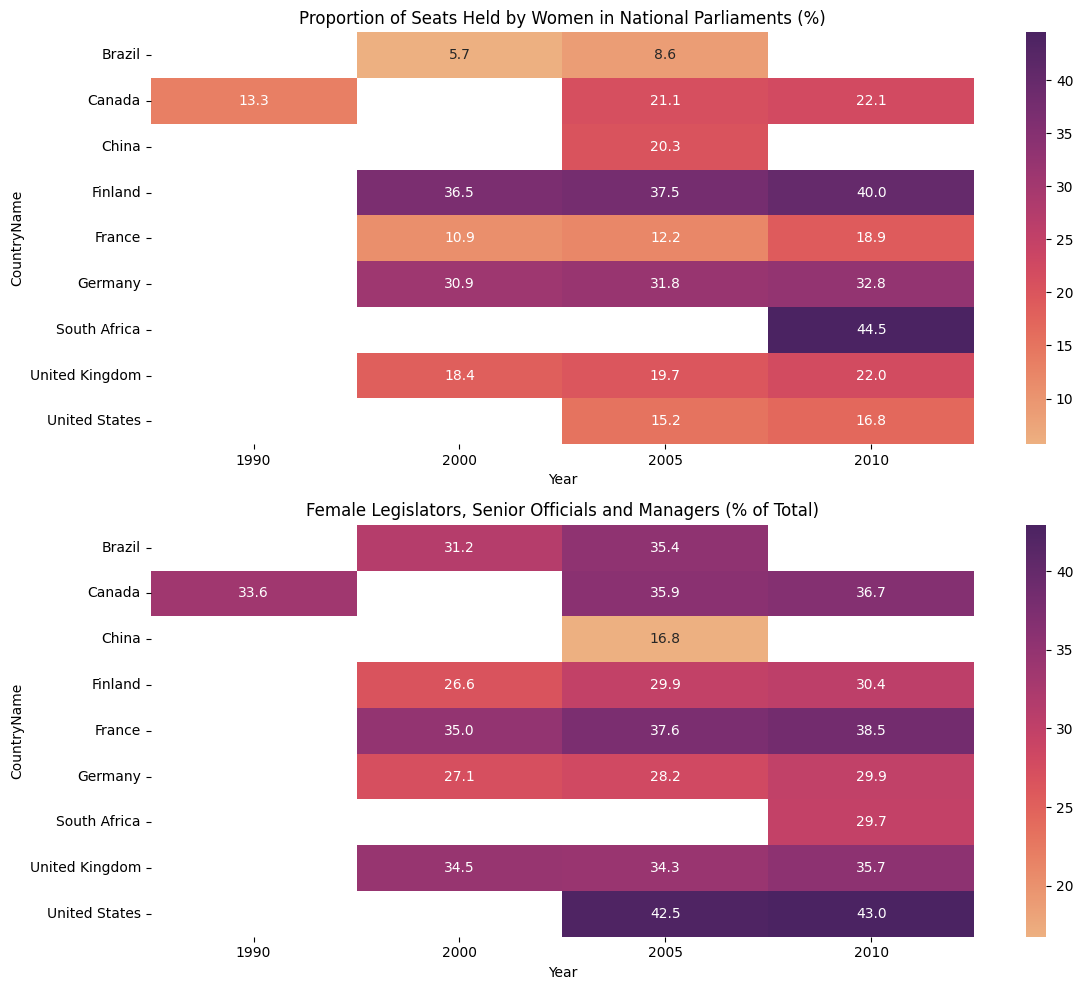

In [ ]:

seats_women_parliament = world_data[
    world_data["IndicatorName"] == "Proportion of seats held by women in national parliaments (%)"
]
female_legislators = world_data[
    world_data["IndicatorName"] == "Female legislators, senior officials and managers (% of total)"
]

# Merge the dataframes on CountryCode and Year
merged_data = pd.merge(
    seats_women_parliament,
    female_legislators,
    on=["CountryCode", "Year", "CountryName"],
    how="inner",
    suffixes=("_parliament", "_legislators"),
)

# Select countries for the visualization
countries = ['United States', 'Canada', 'United Kingdom', 'Germany', 'France', 'Japan', 'China', 'Finland', 'Brazil', 'South Africa']
years = [1990, 1995, 2000, 2005,2010,2014]

# Filter the data for the selected countries and years
filtered_data = merged_data[
    (merged_data["CountryName"].isin(countries)) & (merged_data["Year"].isin(years))
]

# Create a pivot table to reshape the data for the heatmap
heatmap_data_parliament = filtered_data.pivot(
    index="CountryName", columns="Year", values="Value_parliament"
)
heatmap_data_legislators = filtered_data.pivot(
    index="CountryName", columns="Year", values="Value_legislators"
)

# Create two subplots for the heatmaps
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot the heatmap for "Proportion of seats held by women in national parliaments (%)"
sns.heatmap(
    heatmap_data_parliament, annot=True, fmt=".1f", cmap="flare", ax=axes[0]
)
axes[0].set_title(
    "Proportion of Seats Held by Women in National Parliaments (%)"
)

# Plot the heatmap for "Female legislators, senior officials and managers (% of total)"
sns.heatmap(
    heatmap_data_legislators, annot=True, fmt=".1f", cmap="flare", ax=axes[1]
)
axes[1].set_title("Female Legislators, Senior Officials and Managers (% of Total)")

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()